# Circuit of Deutsch Algorithm using TheQ

This notebook will teach you how to construct your own circuits for the Deutsch algorithm using TheQ.

# Importing packages

In [ ]:
# Server addresses should be stable, but may occasionally be offline
import requests
import json
import math
from google.colab import files
#req_str = 'http://8b851bd5c0ec.ngrok.io/qsim/perform_operation'
req_str = 'http://187c37408942.ngrok.io/qsim/perform_operation'
#req_str_qasm = 'http://8b851bd5c0ec.ngrok.io/qsim/qasm'
req_str_qasm = 'http://187c37408942.ngrok.io/qsim/qasm'

# Required functions

These are some required functions to run any circuit in TheQ

In [ ]:
# Define Create ciruit (these are the four core definitions for any circuit)
# all circuits must be bookmarked by the create_circuit and destroy_circuit command

# Initial_state is a binary integer to initalise all qubit, 
# most often initial_state=0.
def create_circuit(qubits,initial_state):
    data = {
        'operation': 'create_circuit',
        'num_qubits': qubits
    }
    result = requests.post(req_str, json=data)
    json_obj = json.loads(result.content)
    reg_id = json_obj['result']

    data = {
        'operation': 'set_state',
        'register': reg_id,
        'state': initial_state,
        'complex_value': {'re': 1, 'im': 0}
    }
    result = requests.post(req_str, json=data)
    return reg_id

# Gates.  gate_name and params are specified from the list above
def gate(register_id, gate_name, params):
    data = {
        'operation': 'gate',
        'register': register_id,
        'gate': gate_name
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data)
    json_obj=json.loads(result.content)
    return json_obj['result']

# params contain an array of qubit numbers to measure, 'lq2m': [0,1,3] would measure qubits 0, 1 and 3 and return the 
# corresponding 3-bit integer value from 0 to 7.
def measure_qubit(register_id, params):
    data = {
        'operation': 'measure', 
        'register': register_id,
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data)

    json_obj = json.loads(result.content)
    return json_obj['result']

# Always call destroy_circuit to terminate simulation (turn off your QC)
def destroy_circuit(register_id):
  data = {
        'operation': 'destroy_circuit', 
        'register': register_id
  }
  result = requests.post(req_str, json=data)

# Print allows you to output the current computational state of the machine.
def print_vector(register_id):
  data = {
        'operation': 'state_vector', 
        'register': register_id
  }
  result = requests.post(req_str, json=data)
  json_obj = json.loads(result.content)
  return json_obj['result']


# The circuit

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for all types of functions that one can use Deutsch algorithm for. Recall that, the Deutsch algorithm is used to figure out, whether a function $f:\{0,1\} \rightarrow \{0,1\}$ is balanced or constant. 

Since there are only 2 possible inputs for these functions, a balanced functions will have 1 input producing the output 0 and 1 input producing the output 1. A constant function is a function whose output is 0 or 1, no matter what input is provided.

Let $U_f$ be an oracle circuit such that
\begin{equation}
  U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
\end{equation}
Then, the circuit for the Deutsch algorithm is given as
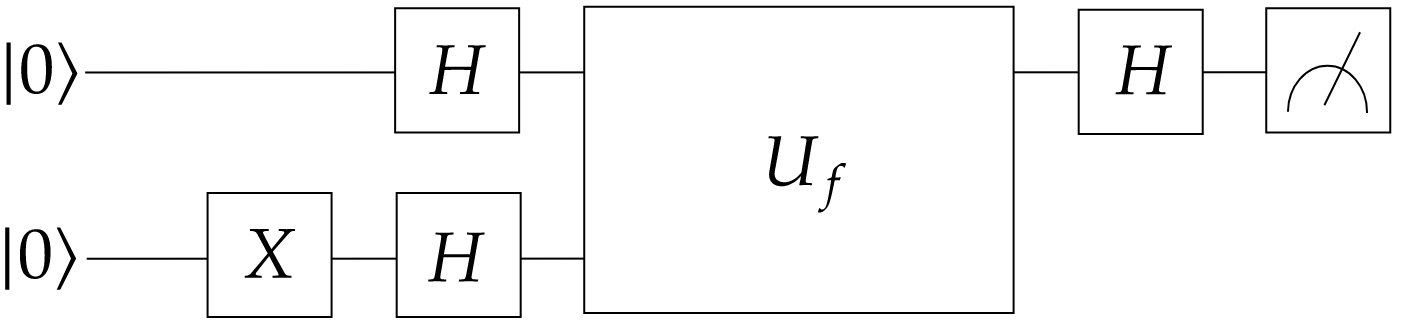

If the output after measuring the first qubit is 0, then the function is constant and if the output is 1, the function is balanced. There are 4 such possible functions; 2 balanced and 2 constant. In the next sections, we shall explain the construction of the circuit for each of the functions

# General Example

Consider an oracle of the form

In [ ]:
# Oracle
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})


Lets see how we can carry out Deutsch algorithm using TheQ

Since the circuit requires two qubits, we create a circuit with two qubits.

In [ ]:
# Prepare the circuit
reg_id = create_circuit(2,0)

Now, we shall start applying the gates.

First step is to prepare $|-\rangle$ in the second qubit. This is done by applying an $X$ gate followed by a $H$ gate.

In [ ]:
# Apply X gate on qubit 1
gate(reg_id, 'X', {'q': 1})

# Apply Hadamard gate on qubit 1
gate(reg_id, 'hadamard', {'q': 1})

True

Next we apply $H$ on the first qubit, then our oracle, and one more $H$ on the first qubit

In [ ]:
# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Oracle
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 0})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

True

Now, we shall measure the first qubit.

In [ ]:
# Measure qubit 0
c0 = measure_qubit(reg_id,{'lq2m': [0]})

# Print measurement result
print("Q Computer returned value = ", c0)

# Destroy the circuit
destroy_circuit(reg_id)

Q Computer returned value =  1


We can see that, the output is 1, confirming that the function that the oracle executes is balanced.

Now, let's verify if the function was indeed constant by computing the outputs of all possible inputs.

In [ ]:
# This function converts a decimal number to its binary expansion
def Binary(x, BitNo):
  format(x, 'b').zfill(BitNo)
  Binlist = [int(y) for y in list(format(x, 'b').zfill(BitNo))]
  return Binlist

for i in range(2):
  # Compute the binary expansion of i
  bin_list = Binary(i, 1)
  
  # Prepare the circuit
  reg_id = create_circuit(2,0)

  # Prepare the state associated with i
  for j in range(1):
    if bin_list[j] == 1:
        gate(reg_id, 'X', {'q': j})

  # Oracle
  gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
  gate(reg_id, 'X', {'q': 1})
  gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
  gate(reg_id, 'X', {'q': 0})
  gate(reg_id, 'X', {'q': 1})
  gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
  gate(reg_id, 'X', {'q': 0})
  gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
  gate(reg_id, 'X', {'q': 1})
  gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
  gate(reg_id, 'X', {'q': 0})

  # Measure qubits 2
  c0 = measure_qubit(reg_id,{'lq2m': [1]})

  # Destroy circuit
  destroy_circuit(reg_id)

  print("Input: {}".format(i))
  print("Output: {}".format(c0))

Input: 0
Output: 0
Input: 1
Output: 1


The function is indeed balanced.

# Circuits for balanced functions

We start with balanced functions. 

## Case 1

Let $f_1:\{0,1\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_1(0) = 0 \\
  f_1(1) = 1
\end{equation}

The first step is to construct $U_{f_1}$. By the definition of $U_{f_1}$, one can see that $U_{f_1}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_1}|0\rangle|0\rangle = |0\rangle|0 \oplus f_1(0)\rangle = |0\rangle|0\rangle\\
  U_{f_1}|0\rangle|1\rangle = |0\rangle|1 \oplus f_1(0)\rangle = |0\rangle|1\rangle\\
  U_{f_1}|1\rangle|0\rangle = |1\rangle|0 \oplus f_1(1)\rangle = |1\rangle|1\rangle\\
  U_{f_1}|1\rangle|1\rangle = |1\rangle|1 \oplus f_1(1)\rangle = |1\rangle|0\rangle\\
\end{equation}

This should be a very familiar gate to you. It is simply a CNOT gate. So, for this function, a single CNOT gate is the required oracle $U_{f_1}$. Then the final circuit can be seen as

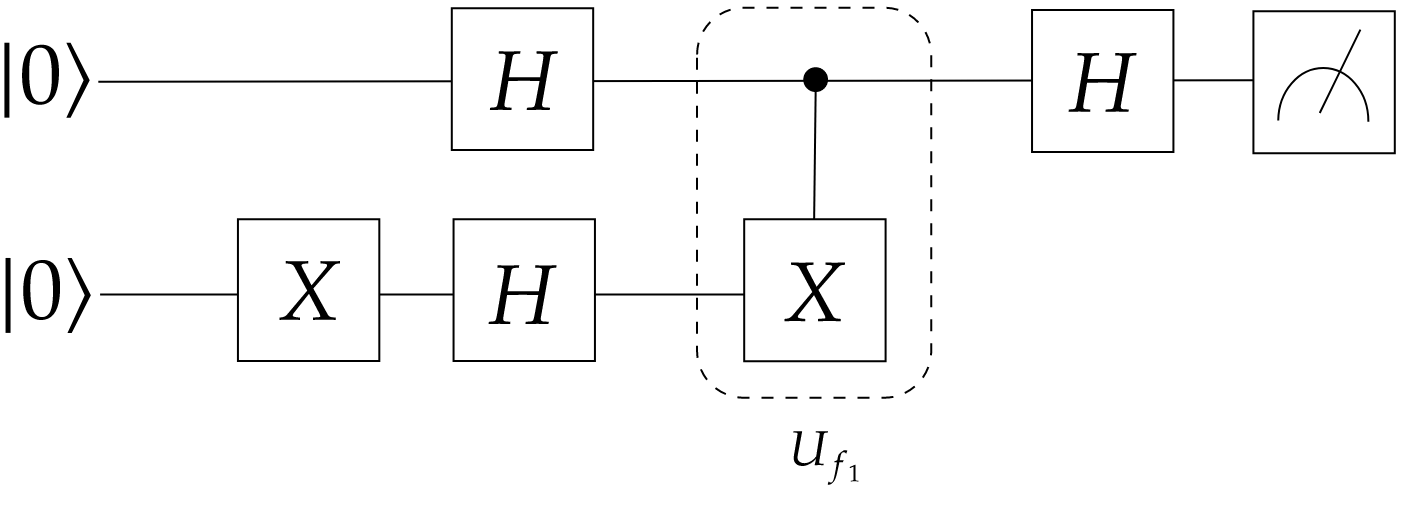

Executing the cell below runs a quantum circuit for the Deutsch algorithm for the function $f_1$.

In [ ]:
# Prepare the circuit
reg_id = create_circuit(2,0)

# Prepare '-' state on qubit 1
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'hadamard', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Apply oracle
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Measure qubit 0
c0 = measure_qubit(reg_id,{'lq2m': [0]})

# Display results
print("Q Computer returned value = ", c0)

# Destroy circuit
destroy_circuit(reg_id)

Q Computer returned value =  1


## Case 2

Let $f_2:\{0,1\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_2(0) = 1 \\
  f_2(1) = 0
\end{equation}

The first step is to construct $U_{f_2}$. By the definition of $U_{f_2}$, one can see that $U_{f_2}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_2}|0\rangle|0\rangle = |0\rangle|0 \oplus f_2(0)\rangle = |0\rangle|1\rangle\\
  U_{f_2}|0\rangle|1\rangle = |0\rangle|1 \oplus f_2(0)\rangle = |0\rangle|0\rangle\\
  U_{f_2}|1\rangle|0\rangle = |1\rangle|0 \oplus f_2(1)\rangle = |1\rangle|0\rangle\\
  U_{f_2}|1\rangle|1\rangle = |1\rangle|1 \oplus f_2(1)\rangle = |1\rangle|1\rangle\\
\end{equation}

You can see that $f_2$ is basically $f_1$ with bit flip at the end. Therefore, the circuit $U_{f_2}$ is nothing but a CNOT followed by an $X$ gate on the second (target) qubit.

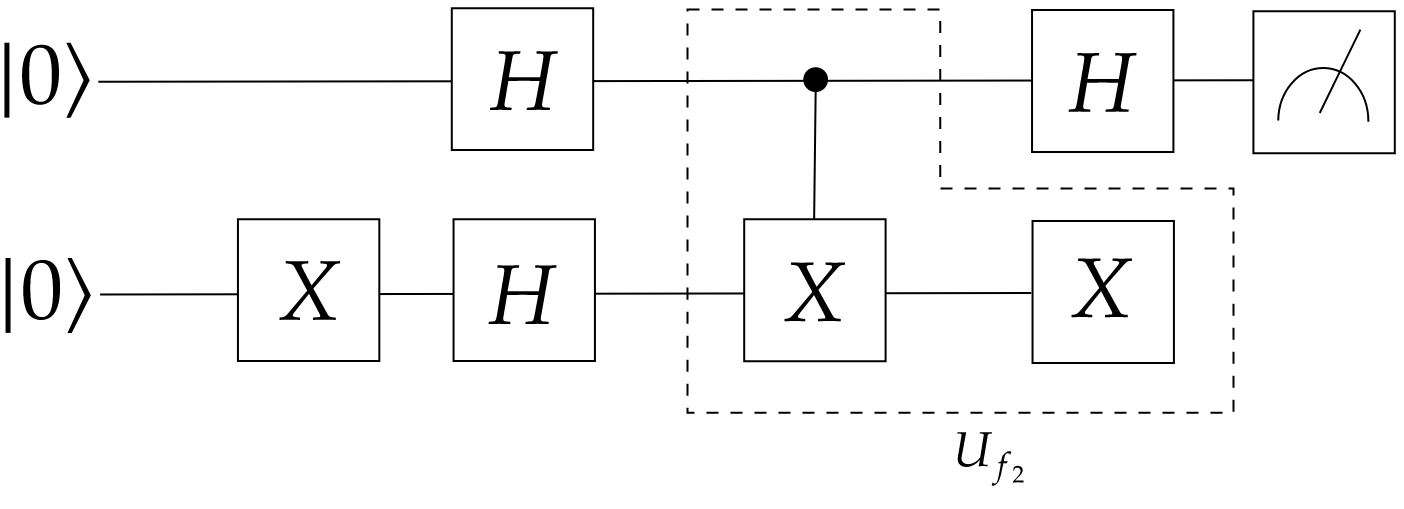

We can see from the circuit that the last $X$ gate on the second qubit does not interfere with the first qubit in any way and hence the result after measuring the first qubit should not any different from $f_1$'s circuit


Executing the cell below runs a quantum circuit for the Deutsch algorithm for the function $f_2$.

In [ ]:
# Prepare the circuit
reg_id = create_circuit(2,0)

# Prepare '-' state on qubit 1
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'hadamard', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Apply oracle
gate(reg_id, 'cnot', {'q_control': 0, 'q_target': 1})
gate(reg_id, 'X', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Measure qubit 0
c0 = measure_qubit(reg_id,{'lq2m': [0]})

# Display results
print("Q Computer returned value = ", c0)

# Destroy circuit
destroy_circuit(reg_id)

Q Computer returned value =  1


As expected, we can see that, the output is 1.

# Circuits for constant functions

Now we shall move on to constant functions. 

## Constant function with 0 as output

Let $\mathcal{C}_0:\{0,1\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  \mathcal{C}_0(0) = 0 \\
  \mathcal{C}_0(1) = 0
\end{equation}

The first step is to construct $U_{\mathcal{C}_0}$. By the definition of $U_{\mathcal{C}_0}$, one can see that $U_{\mathcal{C}_0}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{\mathcal{C}_0}|0\rangle|0\rangle = |0\rangle|0 \oplus \mathcal{C}_0(0)\rangle = |0\rangle|0\rangle\\
  U_{\mathcal{C}_0}|0\rangle|1\rangle = |0\rangle|1 \oplus \mathcal{C}_0(0)\rangle = |0\rangle|1\rangle\\
  U_{\mathcal{C}_0}|1\rangle|0\rangle = |1\rangle|0 \oplus \mathcal{C}_0(1)\rangle = |1\rangle|0\rangle\\
  U_{\mathcal{C}_0}|1\rangle|1\rangle = |1\rangle|1 \oplus \mathcal{C}_0(1)\rangle = |1\rangle|1\rangle\\
\end{equation}

This is simply the identity matrix. This means that in this case, from the original circuit for Deutsch algorithm, we can remove the oracle part completely, resulting in the circuit

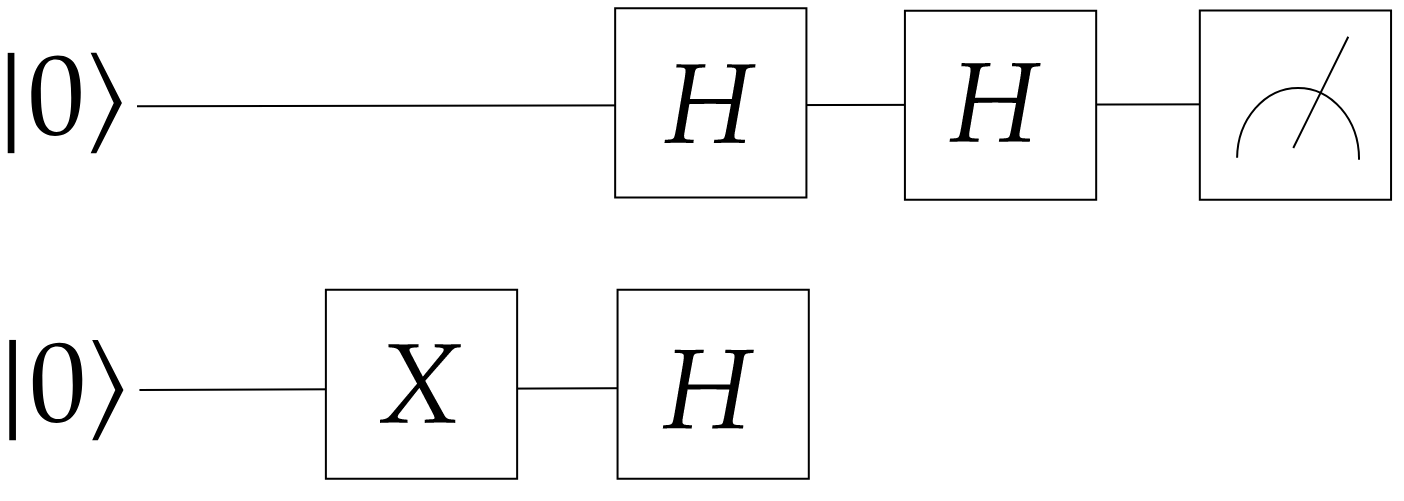

We can clearly see from the circuit why the output of measuring the first qubit should be 0. Both the $H$ gates in the first register just cancels out and you are left with $|0\rangle$

Executing the cell below runs a quantum circuit for Deutsch algorithm for the function $\mathcal{C}_0$.

In [ ]:
# Prepare the circuit
reg_id = create_circuit(2,0)

# Prepare '-' state on qubit 1
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'hadamard', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Apply oracle

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Measure qubit 0
c0 = measure_qubit(reg_id,{'lq2m': [0]})

# Display results
print("Q Computer returned value = ", c0)

# Destroy circuit
destroy_circuit(reg_id)

Q Computer returned value =  0


As expected, we can see that, the output is 0.

## Constant function with 1 as output

Let $\mathcal{C}_1:\{0,1\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  \mathcal{C}_1(0) = 1 \\
  \mathcal{C}_1(1) = 1
\end{equation}

The first step is to construct $U_{\mathcal{C}_1}$. By the definition of $U_{\mathcal{C}_1}$, one can see that $U_{\mathcal{C}_1}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{\mathcal{C}_1}|0\rangle|0\rangle = |0\rangle|0 \oplus \mathcal{C}_1(0)\rangle = |0\rangle|1\rangle\\
  U_{\mathcal{C}_1}|0\rangle|1\rangle = |0\rangle|1 \oplus \mathcal{C}_1(0)\rangle = |0\rangle|0\rangle\\
  U_{\mathcal{C}_1}|1\rangle|0\rangle = |1\rangle|0 \oplus \mathcal{C}_1(1)\rangle = |1\rangle|1\rangle\\
  U_{\mathcal{C}_1}|1\rangle|1\rangle = |1\rangle|1 \oplus \mathcal{C}_1(1)\rangle = |1\rangle|0\rangle\\
\end{equation}

This means that the oracle circuit consists of only an $X$ gate on the second qubit. So the final circuit is

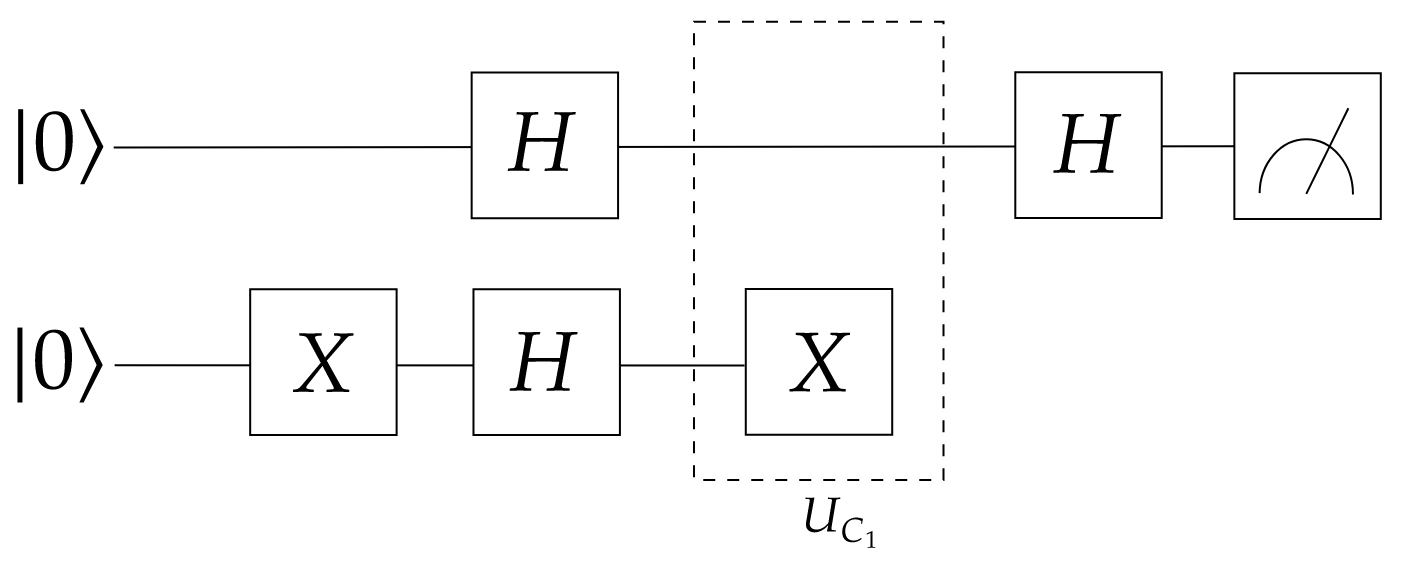

Similar to the case with $\mathcal{C}_0$, the oracle $U_{\mathcal{C}_1}$ also does not do anything to the first qubit. Hence, the $H$ gates on the first qubit cancel out and measuring the first qubit will result in $|0\rangle$

Executing the cell below runs a quantum circuit for Deutsch algorithm for the function $\mathcal{C}_1$.

In [ ]:
# Prepare the circuit
reg_id = create_circuit(2,0)

# Prepare '-' state on qubit 1
gate(reg_id, 'X', {'q': 1})
gate(reg_id, 'hadamard', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Apply oracle
gate(reg_id, 'X', {'q': 1})

# Apply Hadamard gate on qubit 0
gate(reg_id, 'hadamard', {'q': 0})

# Measure qubit 0
c0 = measure_qubit(reg_id,{'lq2m': [0]})

# Display results
print("Q Computer returned value = ", c0)

# Destroy circuit
destroy_circuit(reg_id)

Q Computer returned value =  0


As expected, we can see that, the output is 0.